In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor,XGBClassifier
from sklearn import metrics
from sklearn.impute import SimpleImputer

## loading dataset

In [13]:
df = pd.read_excel('Copper_Set.xlsx')
df[:4]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00


In [14]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [15]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer



# Creating a SimpleImputer for categorical features with strategy 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the categorical columns
df[['country', 'application','material_ref']] = imputer.fit_transform(df[['country', 'application','material_ref']])

df[:4]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00


In [17]:
catg_data = df[['id', 'item_date', 'customer', 'country', 'status',
       'item type', 'application', 'material_ref',
       'product_ref', 'delivery date']]
catg_data[:3]

,id,item_date,customer,country,status,item type,application,material_ref,product_ref,delivery date
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,30156308.0,28.0,Won,W,10.0,DEQ1 S460MC,1670798778,20210701.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,30202938.0,25.0,Won,W,41.0,0000000000000000000000000000000000104991,1668701718,20210401.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,30153963.0,30.0,Won,WI,28.0,S0380700,628377,20210101.0


In [18]:
# Using pandas get_dummies for One-Hot Encoding

# df = pd.get_dummies(df, columns=['customer', 'country', 'status', 'item type', 'application', 'material_ref', 'product_ref'])

from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()
# Apply label encoding to each categorical column

df['customer'] = le.fit_transform(df['customer'])

df['country'] = le.fit_transform(df['country'])
df['status'] = le.fit_transform(df['status'])
df['item type'] = le.fit_transform(df['item type'])
df['application'] = le.fit_transform(df['application'])
df['material_ref'] = le.fit_transform(df['material_ref'])
df['product_ref'] = le.fit_transform(df['product_ref'])

In [19]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,51,3,7,5,4,2.00,1500.0,10445,24,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,288,0,7,5,17,0.80,1210.0,1184,22,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,39,4,7,6,12,0.38,952.0,14749,5,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,955,5,7,3,21,2.30,1317.0,10719,22,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,397,3,7,5,4,4.00,2000.0,6976,8,20210301.0,577.00


In [20]:
df.shape

(181673, 14)

In [21]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

# df = df.dropna(subset=['item_date','delivery date'],axis=1)

# df['item_date_1'] = df['item_date_1'].dropna(axis=0)
# df['delivery date_1'] = df['delivery date_1'].dropna(axis=0)

df.isna().sum()




id               2
item_date        3
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        1
width            0
material_ref     0
product_ref      0
delivery date    3
selling_price    1
dtype: int64

In [22]:
df[:4]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,51,3,7,5,4,2.00,1500.0,10445,24,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,288,0,7,5,17,0.80,1210.0,1184,22,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,39,4,7,6,12,0.38,952.0,14749,5,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,955,5,7,3,21,2.30,1317.0,10719,22,2021-01-01,768.00


In [23]:
df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])

# df['item_date'] = pd.to_numeric(df['item_date'])
# df['delivery date'] = pd.to_numeric(df['delivery date'])

In [24]:
data = df[['quantity tons','thickness', 'width', 'selling_price','product_ref',
           'customer', 'country', 'status','item type', 'application','item_date','delivery date']]



data = data.dropna()
print(data.info())
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 181665 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   quantity tons  181665 non-null  object        
 1   thickness      181665 non-null  float64       
 2   width          181665 non-null  float64       
 3   selling_price  181665 non-null  float64       
 4   product_ref    181665 non-null  int64         
 5   customer       181665 non-null  int64         
 6   country        181665 non-null  int32         
 7   status         181665 non-null  int32         
 8   item type      181665 non-null  int32         
 9   application    181665 non-null  int32         
 10  item_date      181665 non-null  datetime64[ns]
 11  delivery date  181665 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int32(4), int64(2), object(1)
memory usage: 15.2+ MB
None


quantity tons    0
thickness        0
width            0
selling_price    0
product_ref      0
customer         0
country          0
status           0
item type        0
application      0
item_date        0
delivery date    0
dtype: int64

In [25]:
# # Creating a SimpleImputer for categorical features with strategy 'most_frequent'
# imputer = SimpleImputer(strategy='mean')

# # Apply the imputer to the categorical columns
# # data[['thickness', 'selling_price']] = imputer.fit_transform(data[['thickness', 'selling_price']])

# data = data.dropna(subset=['thickness', 'selling_price'])

# data.isnull().sum()

# print(data.info())

In [26]:
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce')
data = data.dropna(subset=['quantity tons'])
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 181664 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   quantity tons  181664 non-null  float64       
 1   thickness      181664 non-null  float64       
 2   width          181664 non-null  float64       
 3   selling_price  181664 non-null  float64       
 4   product_ref    181664 non-null  int64         
 5   customer       181664 non-null  int64         
 6   country        181664 non-null  int32         
 7   status         181664 non-null  int32         
 8   item type      181664 non-null  int32         
 9   application    181664 non-null  int32         
 10  item_date      181664 non-null  datetime64[ns]
 11  delivery date  181664 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int32(4), int64(2)
memory usage: 15.2 MB


<Axes: >

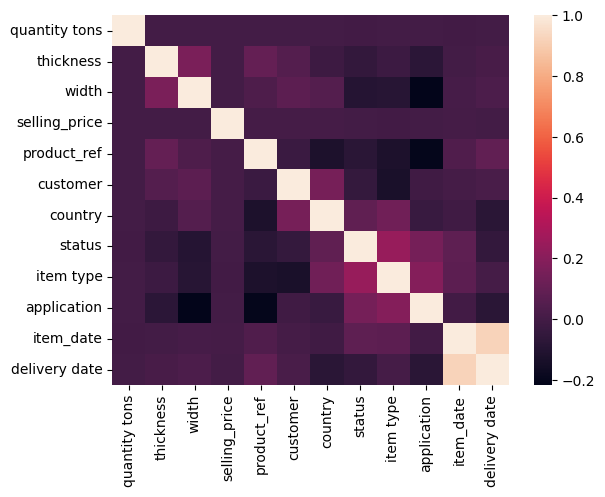

In [27]:
sns.heatmap(data.corr())

# statics analyiss

In [28]:
data.corr()

,quantity tons,thickness,width,selling_price,product_ref,customer,country,status,item type,application,item_date,delivery date
quantity tons,1.000000,-0.000640,-0.000428,-0.000010,-0.000476,-0.000681,-0.000737,-0.002912,-0.002439,-0.001946,-0.004238,-0.002770
thickness,-0.000640,1.000000,0.161713,-0.001130,0.097541,0.054057,-0.021246,-0.051951,-0.026084,-0.078503,0.000432,0.014609
width,-0.000428,0.161713,1.000000,0.000583,0.033211,0.076430,0.051055,-0.093843,-0.092454,-0.216685,0.008884,0.029994
selling_price,-0.000010,-0.001130,0.000583,1.000000,0.003803,0.003000,0.002640,-0.001319,-0.005073,0.000820,0.004449,0.001412
product_ref,-0.000476,0.097541,0.033211,0.003803,1.000000,-0.030502,-0.125325,-0.079707,-0.121812,-0.203186,0.035845,0.088403
customer,-0.000681,0.054057,0.076430,0.003000,-0.030502,1.000000,0.152547,-0.047375,-0.135085,-0.010054,0.002465,0.016968
country,-0.000737,-0.021246,0.051055,0.002640,-0.125325,0.152547,1.000000,0.085091,0.134068,-0.034453,-0.010076,-0.082276
status,-0.002912,-0.051951,-0.093843,-0.001319,-0.079707,-0.047375,0.085091,1.000000,0.242826,0.144829,0.080488,-0.054811
item type,-0.002439,-0.026084,-0.092454,-0.005073,-0.121812,-0.135085,0.134068,0.242826,1.000000,0.190677,0.077165,0.005813
application,-0.001946,-0.078503,-0.216685,0.000820,-0.203186,-0.010054,-0.034453,0.144829,0.190677,1.000000,-0.003515,-0.080733


<Axes: >

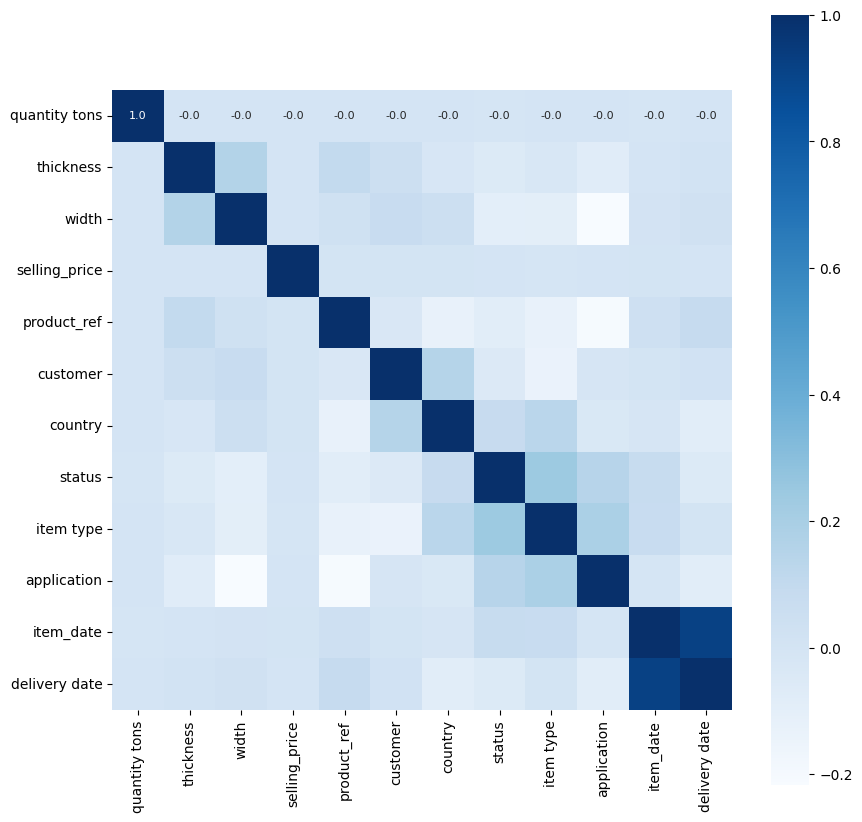

In [29]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [30]:
data.describe()


,quantity tons,thickness,width,selling_price,product_ref,customer,country,status,item type,application,item_date,delivery date
count,1.816640e+05,181664.000000,181664.000000,1.816640e+05,181664.000000,181664.000000,181664.000000,181664.000000,181664.000000,181664.000000,181664,181664
mean,5.875182e+03,2.564891,1295.286055,1.918082e+03,10.269817,408.572937,5.082576,5.131908,4.133059,10.031668,2020-11-26 22:57:31.770301184,2021-01-25 22:44:40.817332736
min,-2.000000e+03,0.180000,1.000000,-1.160000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020-07-02 00:00:00,2019-04-01 00:00:00
25%,1.096989e+01,0.700000,1180.000000,6.690000e+02,2.000000,149.000000,1.000000,2.000000,3.000000,4.000000,2020-09-29 00:00:00,2020-11-01 00:00:00
50%,3.036420e+01,1.500000,1250.000000,8.120000e+02,8.000000,311.000000,4.000000,7.000000,5.000000,5.000000,2020-11-30 00:00:00,2021-01-01 00:00:00
75%,6.716061e+01,3.000000,1500.000000,9.530000e+02,14.000000,653.000000,10.000000,7.000000,5.000000,17.000000,2021-02-03 00:00:00,2021-04-01 00:00:00
max,1.000000e+09,2500.000000,2990.000000,1.000010e+08,32.000000,1169.000000,16.000000,9.000000,6.000000,29.000000,2021-04-01 00:00:00,2022-01-01 00:00:00
std,2.349133e+06,6.572456,261.636191,3.318029e+05,8.194683,318.514287,4.280993,2.644849,1.055230,6.831213,NaN,NaN


In [31]:

import matplotlib.pyplot as plt
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

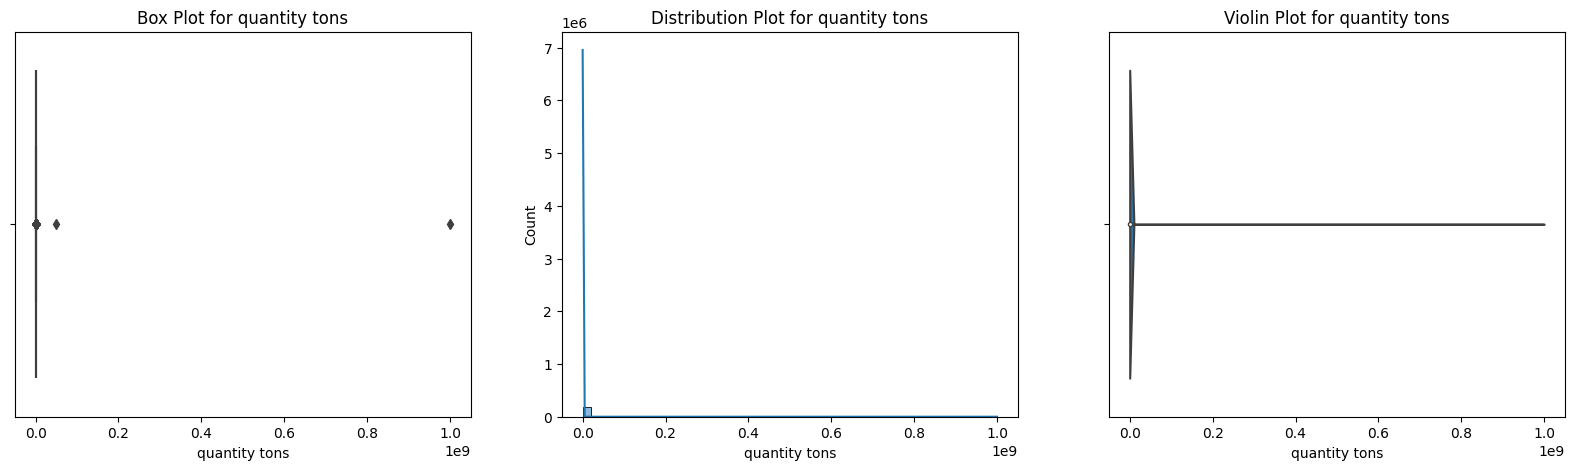

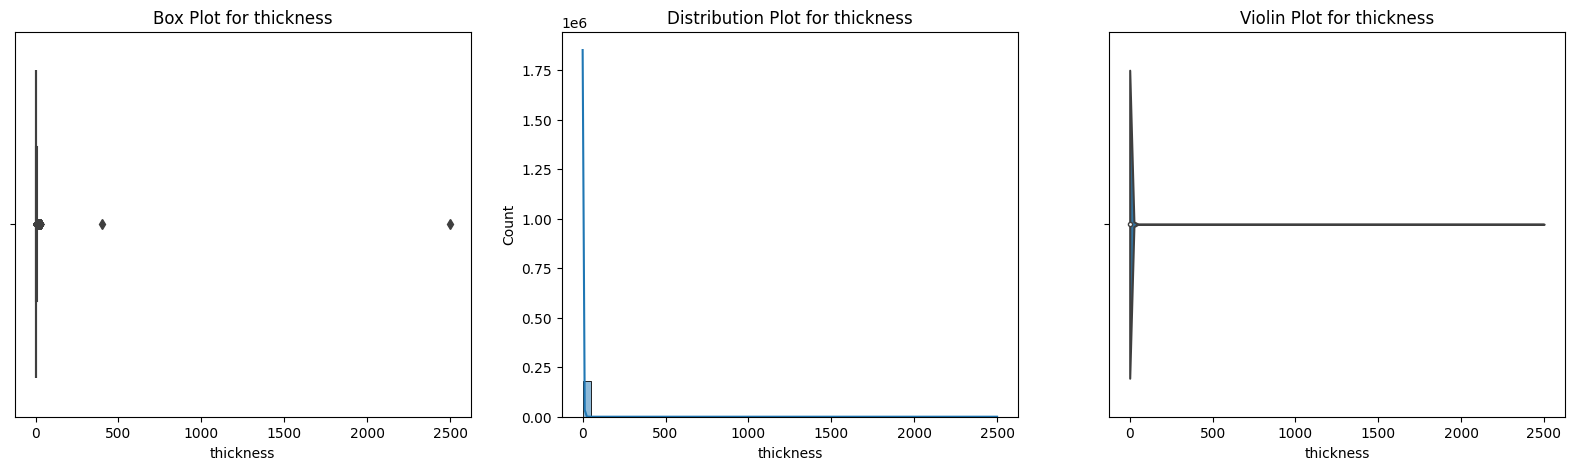

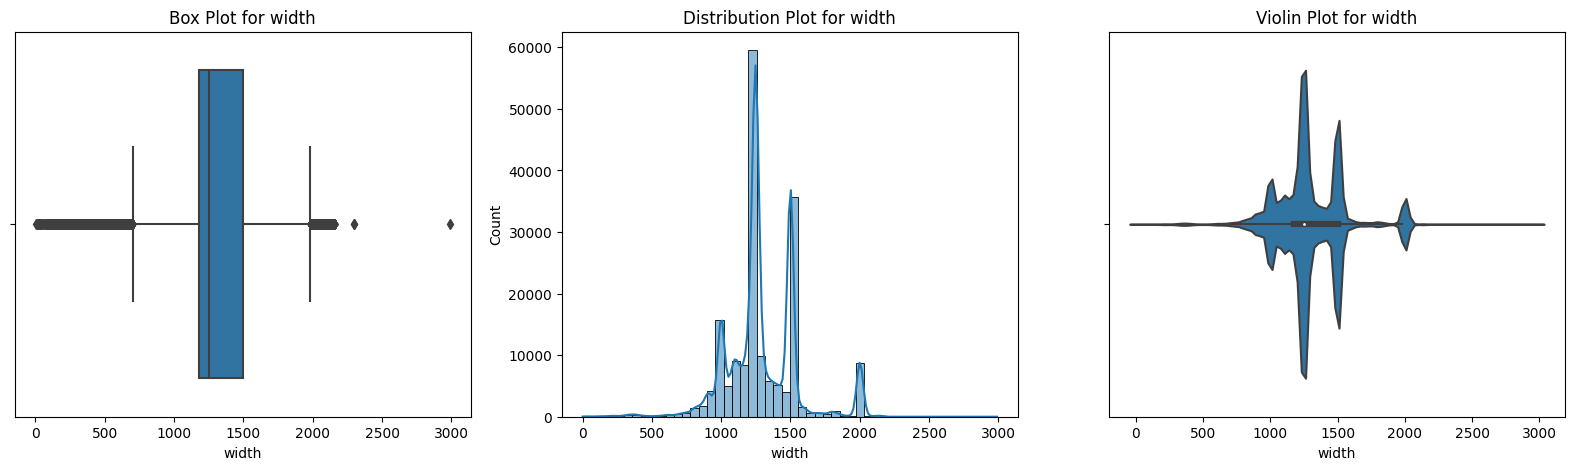

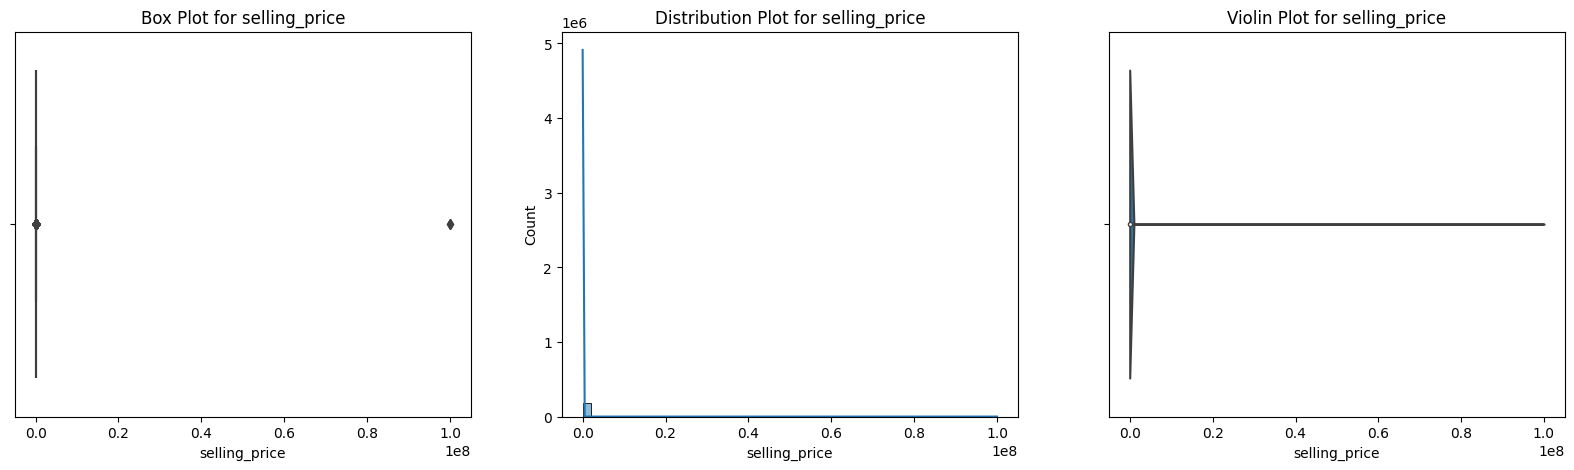

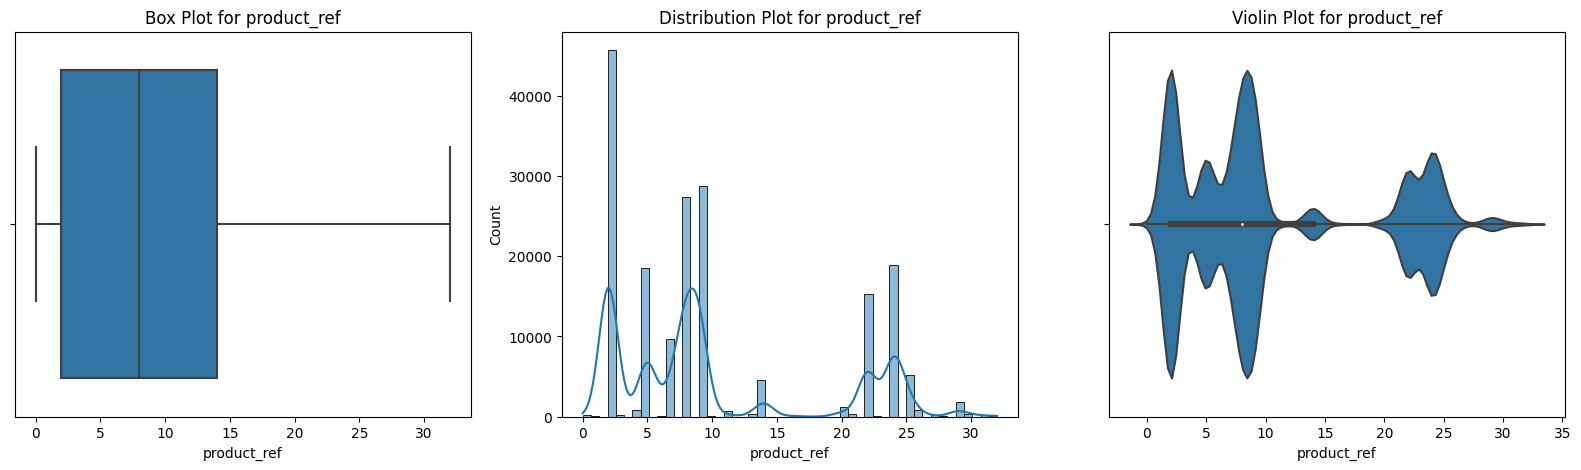

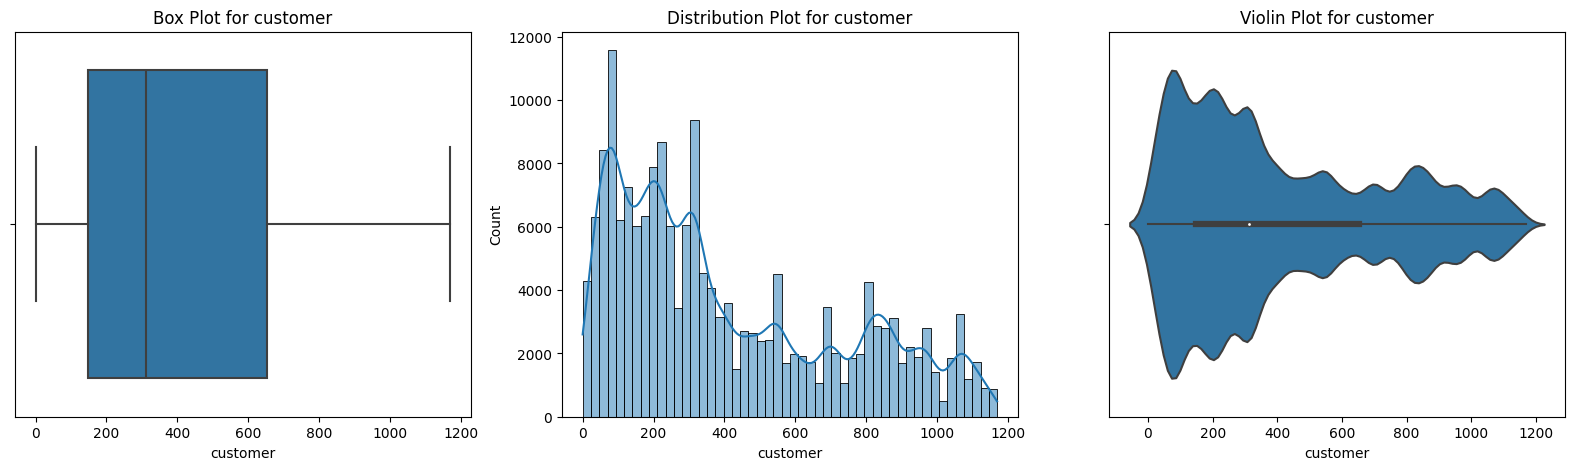

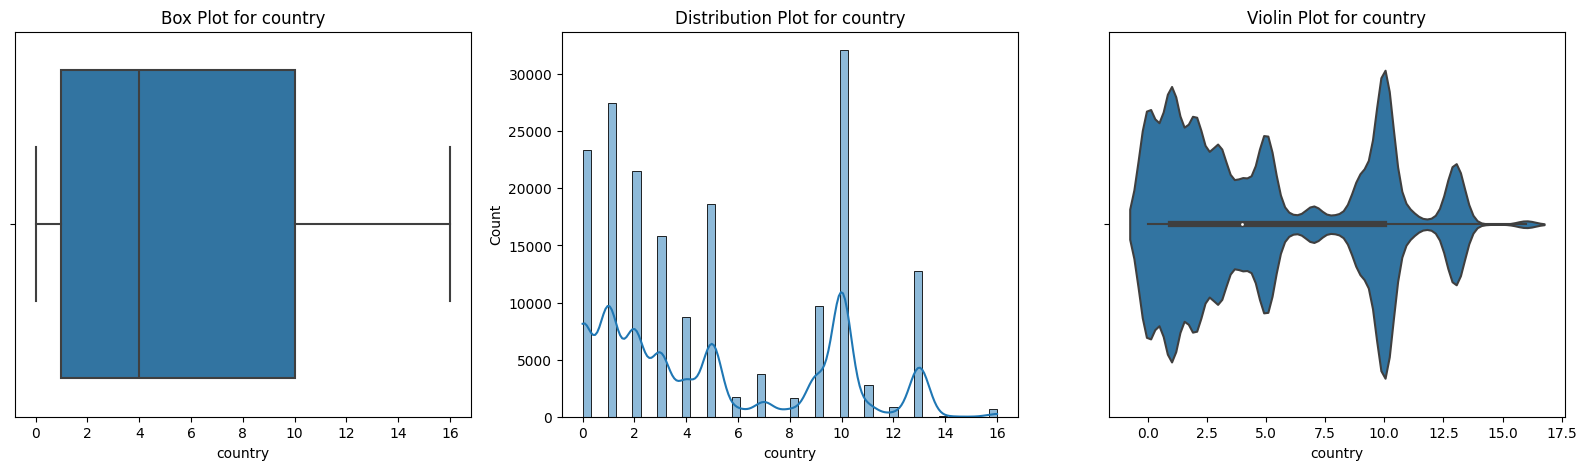

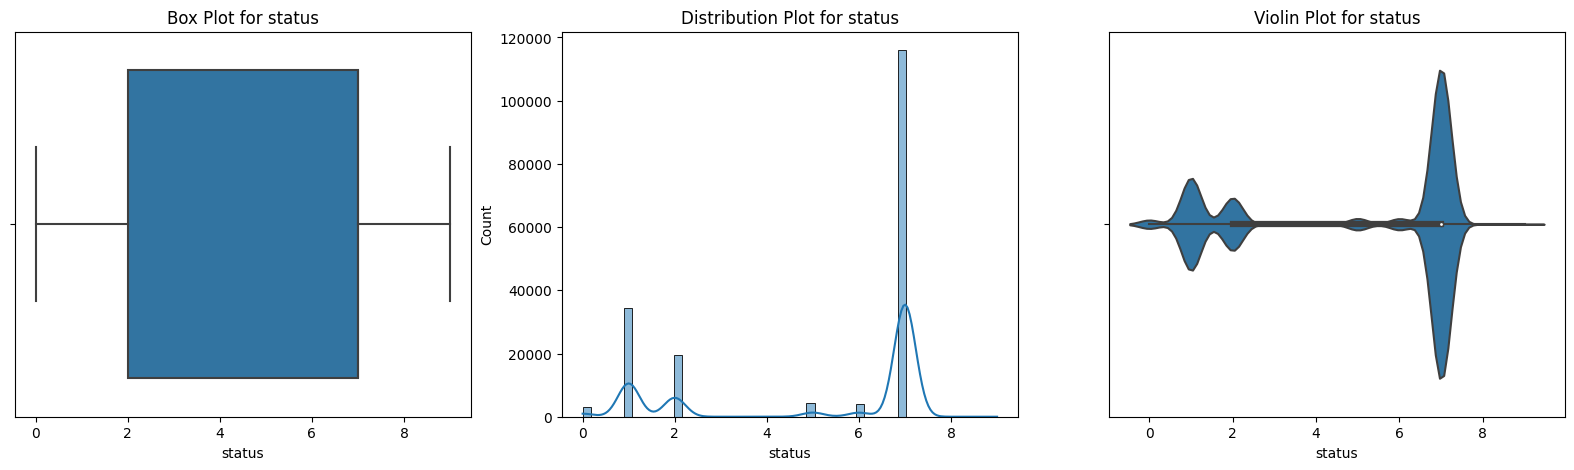

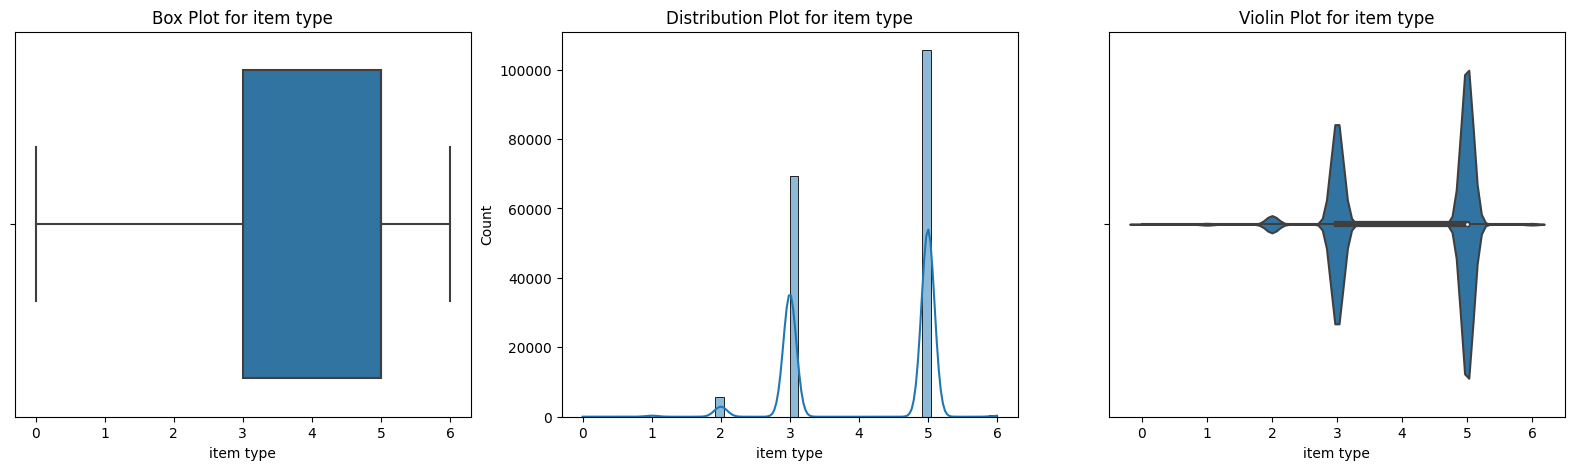

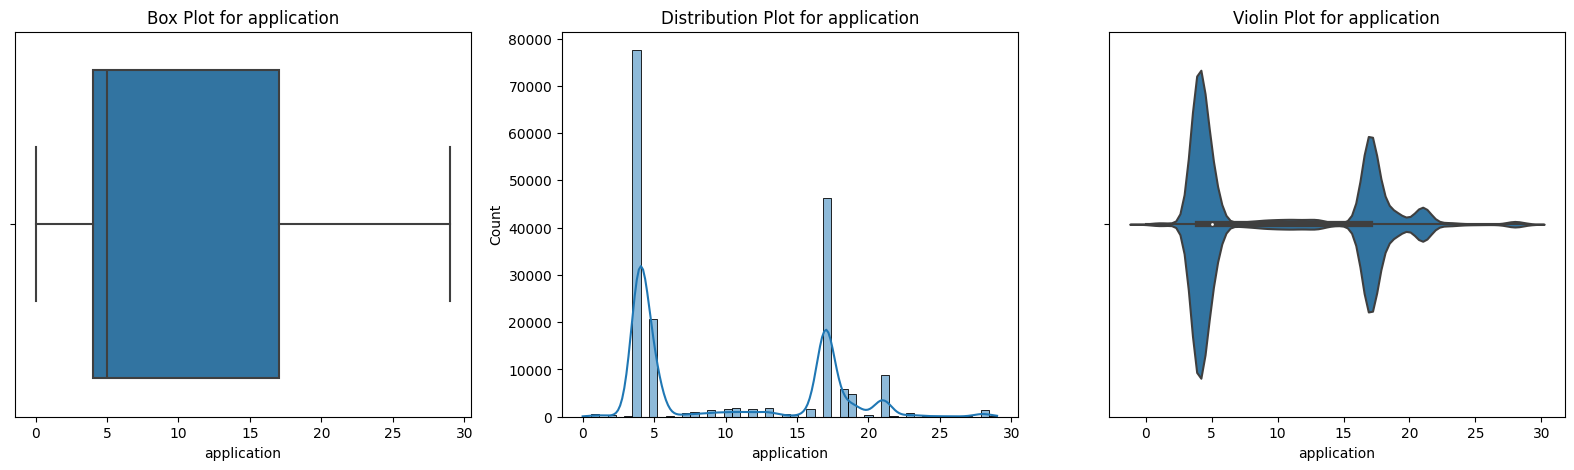

In [32]:
lis = ['quantity tons', 'thickness', 'width', 'selling_price', 'product_ref',
       'customer', 'country', 'status', 'item type', 'application']

for i in lis:
    plot(data, i)

Remove outlier from dataset

In [33]:

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [34]:
df2 = data.copy()
df2[:5]

,quantity tons,thickness,width,selling_price,product_ref,customer,country,status,item type,application,item_date,delivery date
0,54.151139,2.00,1500.0,854.00,24,51,3,7,5,4,2021-04-01,2021-07-01
1,768.024839,0.80,1210.0,1047.00,22,288,0,7,5,17,2021-04-01,2021-04-01
2,386.127949,0.38,952.0,644.33,5,39,4,7,6,12,2021-04-01,2021-01-01
3,202.411065,2.30,1317.0,768.00,22,955,5,7,3,21,2021-04-01,2021-01-01
4,785.526262,4.00,2000.0,577.00,8,397,3,7,5,4,2021-04-01,2021-03-01


In [35]:
outlier(df2, 'quantity tons')
outlier(df2, 'thickness')
outlier(df2, 'selling_price')
outlier(df2, 'width')
outlier(df2, 'application')
df2[:5]

,quantity tons,thickness,width,selling_price,product_ref,customer,country,status,item type,application,item_date,delivery date
0,54.151139,2.00,1500.0,854.00,24,51,3,7,5,4,2021-04-01,2021-07-01
1,151.446694,0.80,1210.0,1047.00,22,288,0,7,5,17,2021-04-01,2021-04-01
2,151.446694,0.38,952.0,644.33,5,39,4,7,6,12,2021-04-01,2021-01-01
3,151.446694,2.30,1317.0,768.00,22,955,5,7,3,21,2021-04-01,2021-01-01
4,151.446694,4.00,1980.0,577.00,8,397,3,7,5,4,2021-04-01,2021-03-01


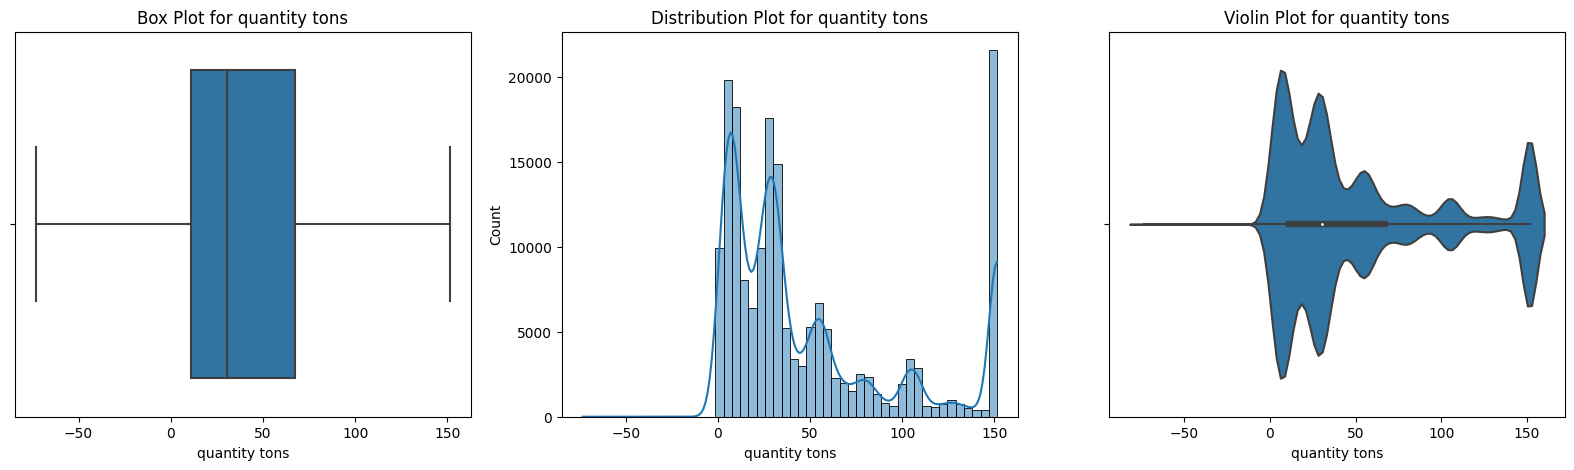

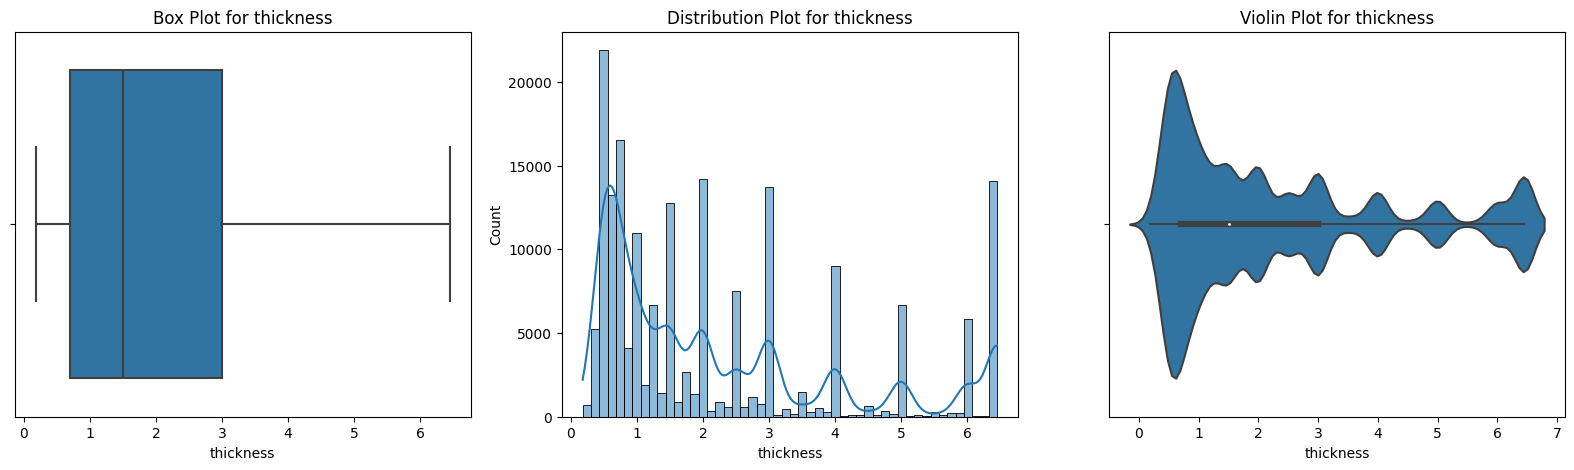

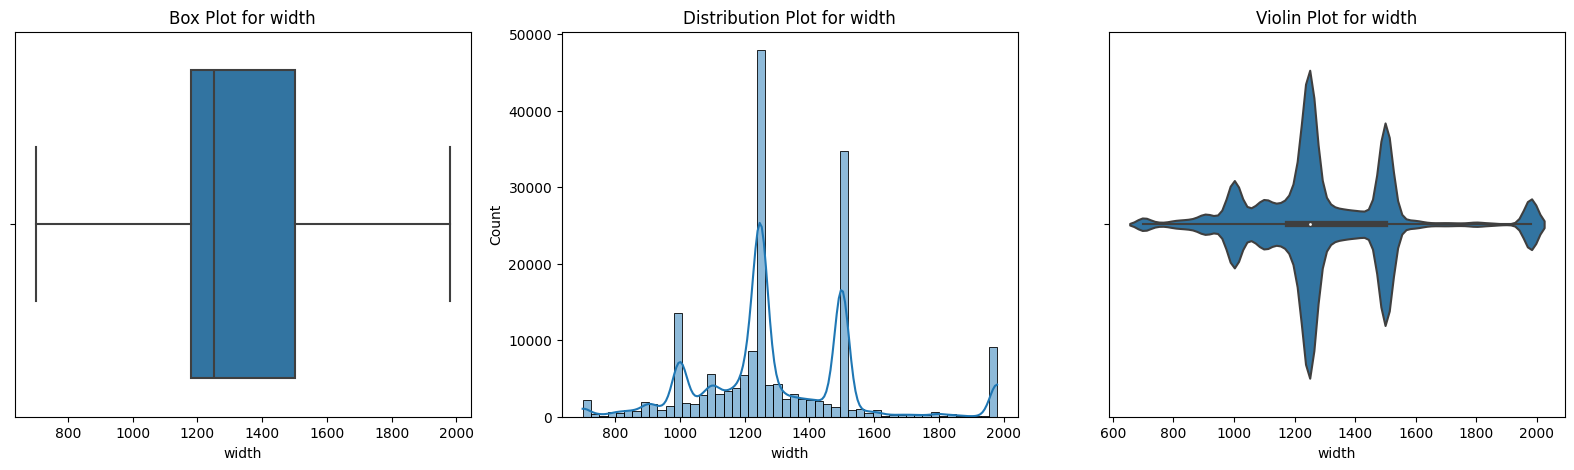

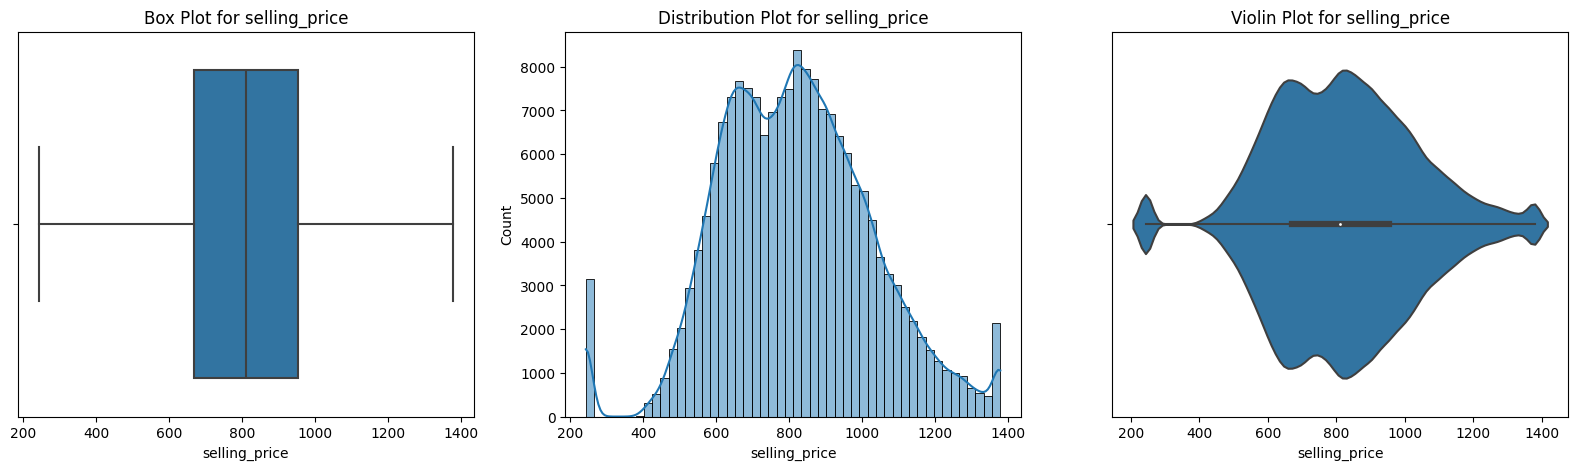

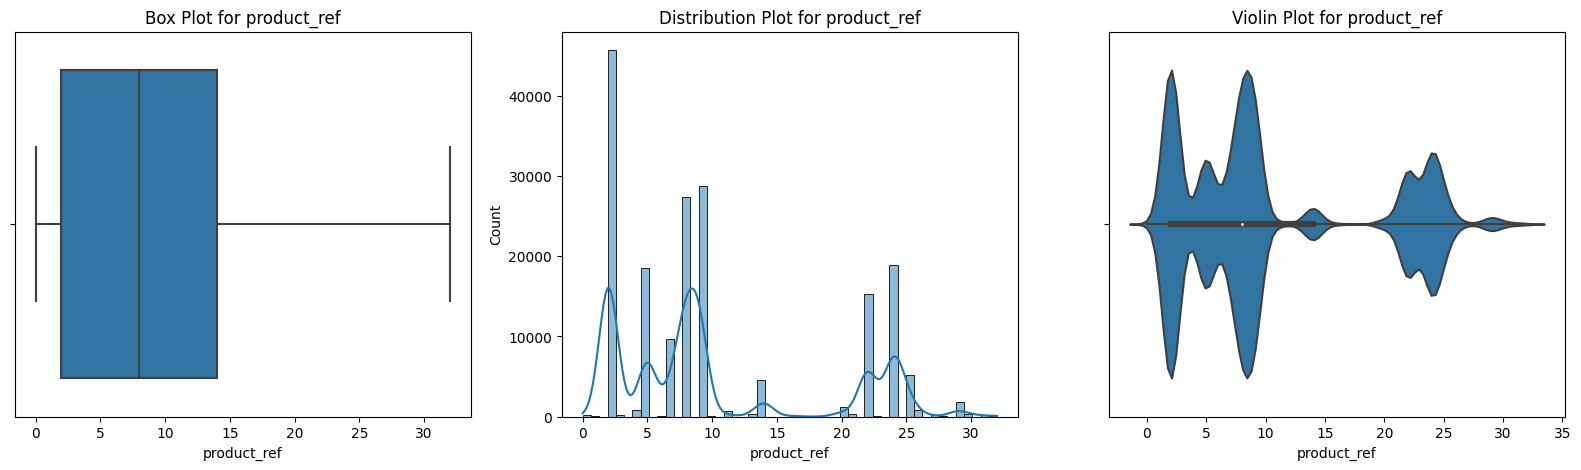

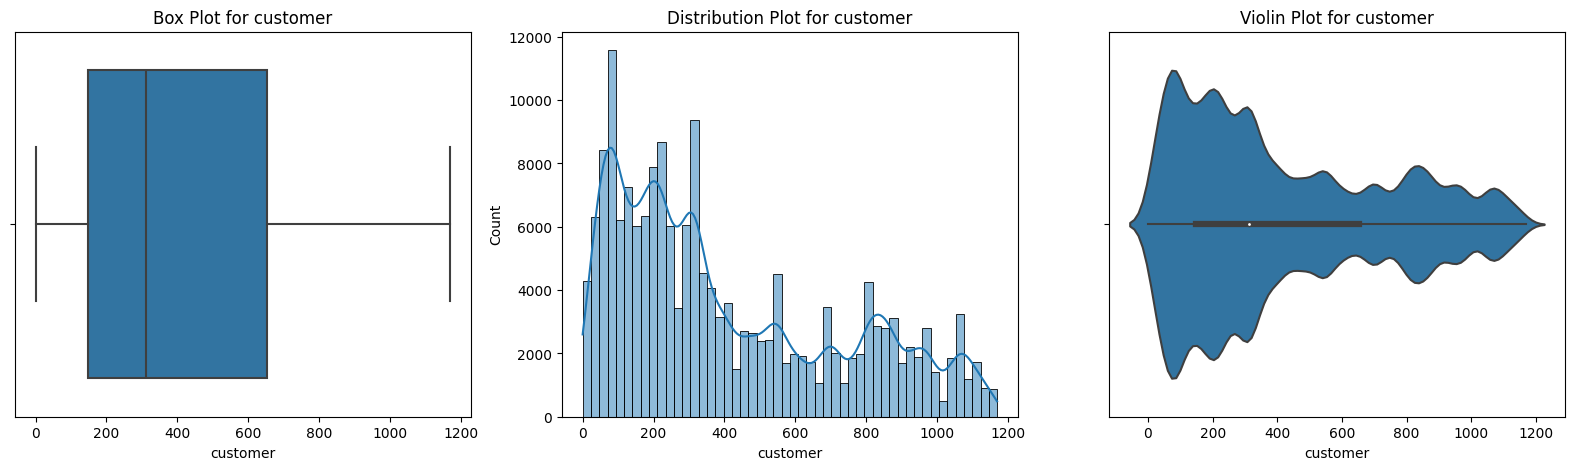

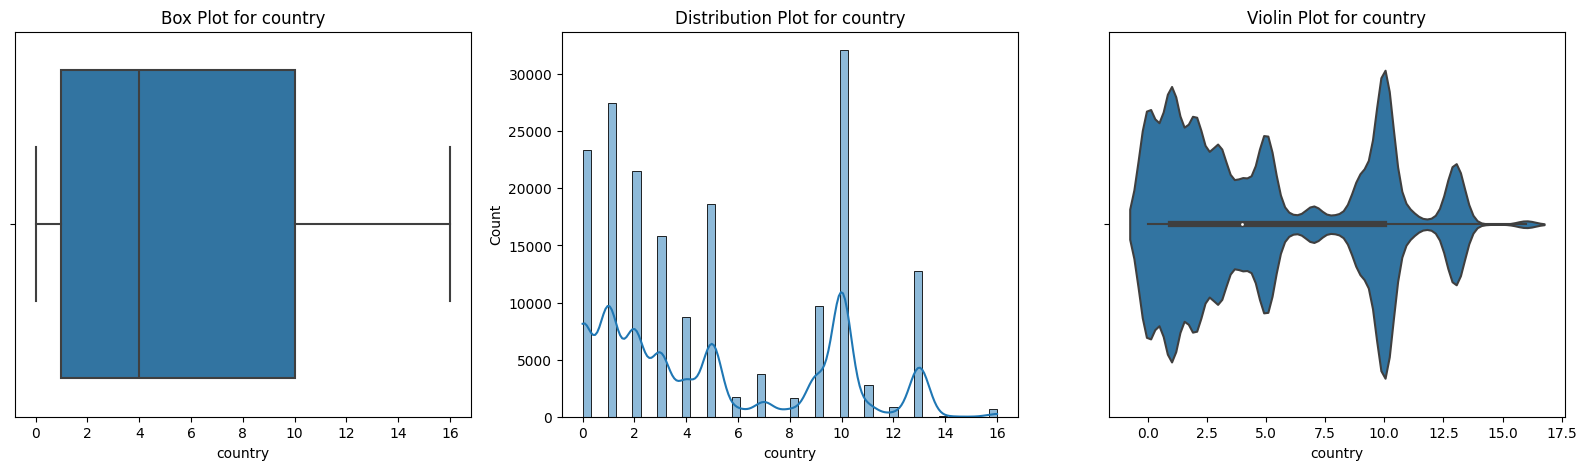

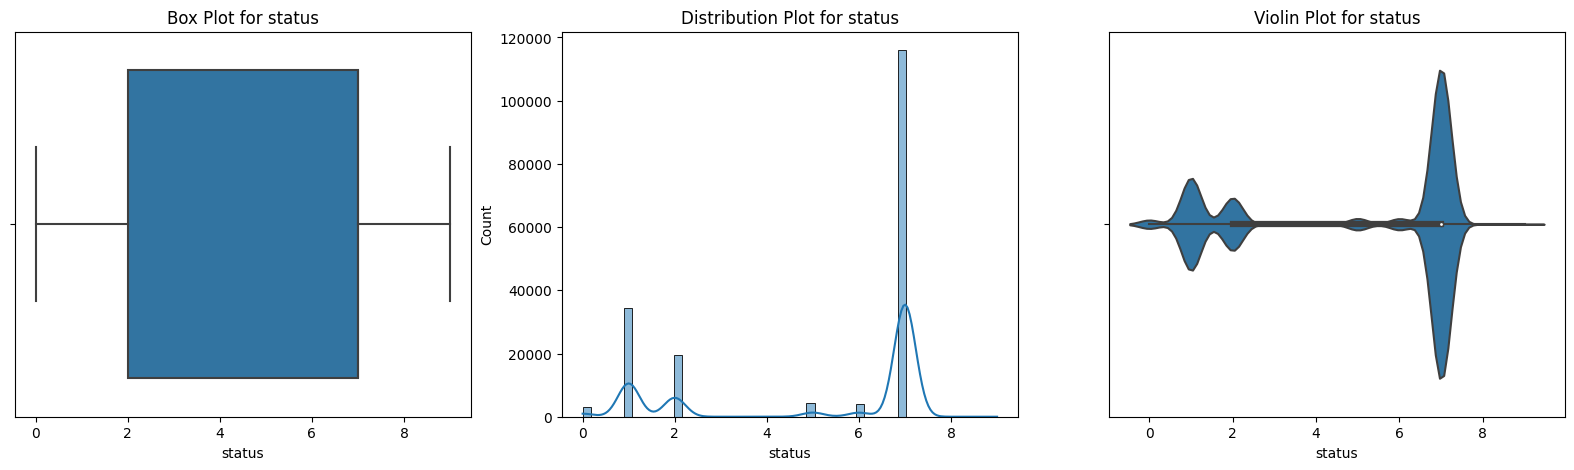

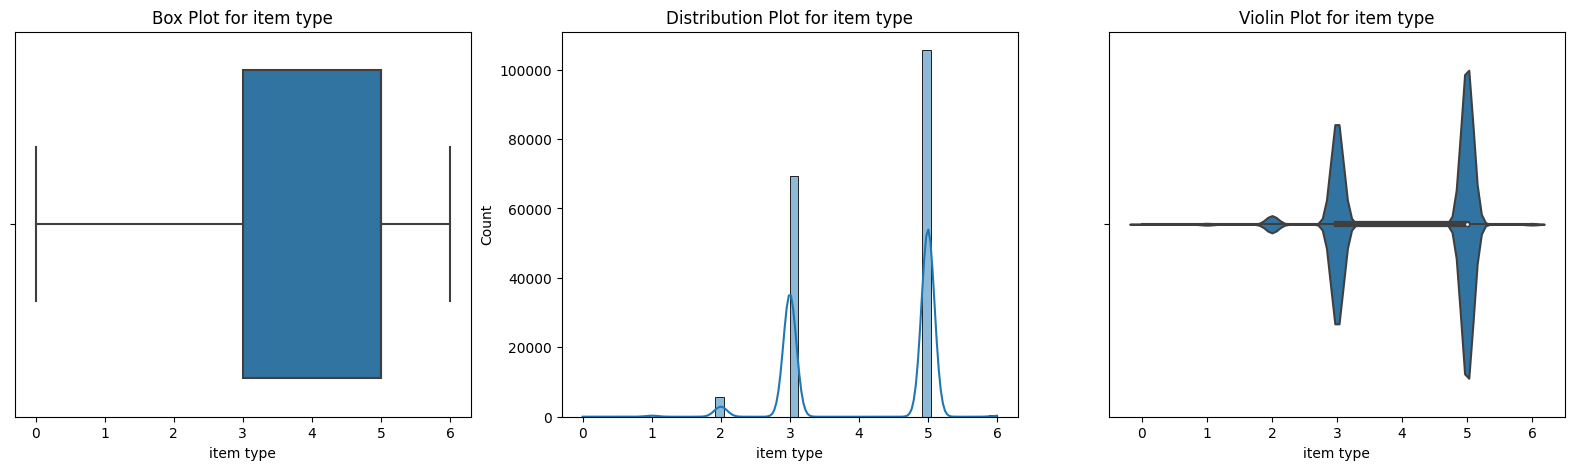

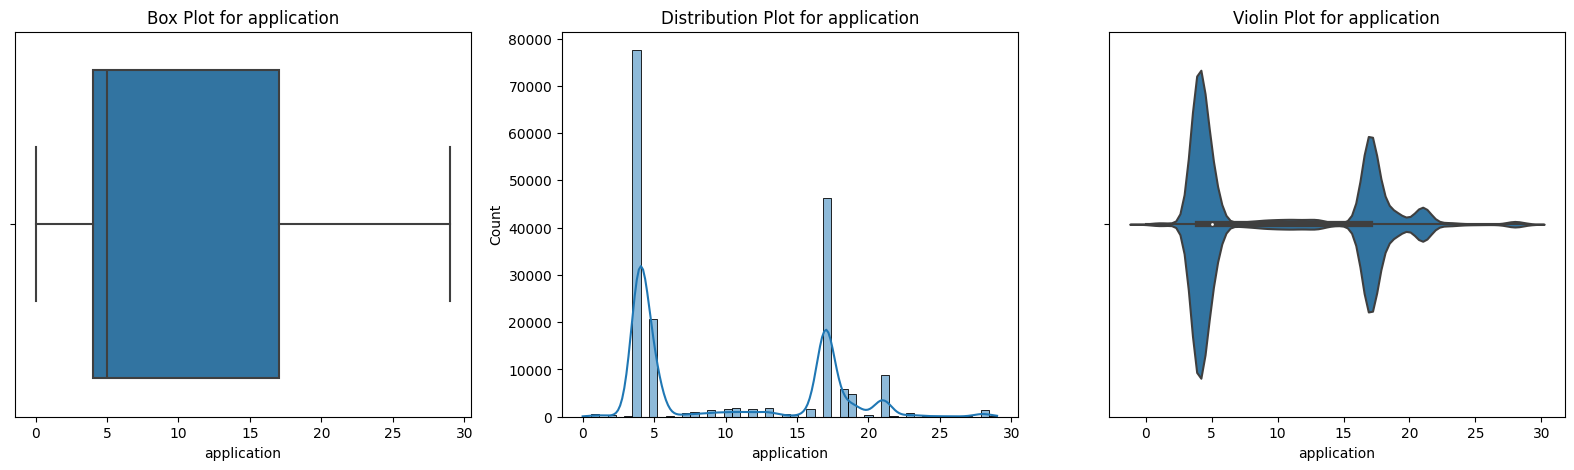

In [36]:
lis = ['quantity tons', 'thickness', 'width', 'selling_price', 'product_ref',
       'customer', 'country', 'status', 'item type', 'application']

for i in lis:
    plot(df2, i)

In [37]:
df2[:5]

,quantity tons,thickness,width,selling_price,product_ref,customer,country,status,item type,application,item_date,delivery date
0,54.151139,2.00,1500.0,854.00,24,51,3,7,5,4,2021-04-01,2021-07-01
1,151.446694,0.80,1210.0,1047.00,22,288,0,7,5,17,2021-04-01,2021-04-01
2,151.446694,0.38,952.0,644.33,5,39,4,7,6,12,2021-04-01,2021-01-01
3,151.446694,2.30,1317.0,768.00,22,955,5,7,3,21,2021-04-01,2021-01-01
4,151.446694,4.00,1980.0,577.00,8,397,3,7,5,4,2021-04-01,2021-03-01


In [38]:
df2.corr()

,quantity tons,thickness,width,selling_price,product_ref,customer,country,status,item type,application,item_date,delivery date
quantity tons,1.000000,0.002786,0.010401,-0.041747,0.068885,0.080877,-0.086953,-0.055867,-0.244985,0.088138,-0.004073,0.016146
thickness,0.002786,1.000000,0.419063,-0.363791,0.316509,0.133663,-0.054175,-0.127179,-0.076796,-0.214761,0.004438,0.042489
width,0.010401,0.419063,1.000000,-0.173256,0.046856,0.078763,0.049045,-0.092664,-0.092089,-0.213435,0.005947,0.026810
selling_price,-0.041747,-0.363791,-0.173256,1.000000,-0.213709,0.005762,-0.015227,0.122158,0.096024,0.168945,0.556365,0.529806
product_ref,0.068885,0.316509,0.046856,-0.213709,1.000000,-0.030502,-0.125325,-0.079707,-0.121812,-0.203186,0.035845,0.088403
customer,0.080877,0.133663,0.078763,0.005762,-0.030502,1.000000,0.152547,-0.047375,-0.135085,-0.010054,0.002465,0.016968
country,-0.086953,-0.054175,0.049045,-0.015227,-0.125325,0.152547,1.000000,0.085091,0.134068,-0.034453,-0.010076,-0.082276
status,-0.055867,-0.127179,-0.092664,0.122158,-0.079707,-0.047375,0.085091,1.000000,0.242826,0.144829,0.080488,-0.054811
item type,-0.244985,-0.076796,-0.092089,0.096024,-0.121812,-0.135085,0.134068,0.242826,1.000000,0.190677,0.077165,0.005813
application,0.088138,-0.214761,-0.213435,0.168945,-0.203186,-0.010054,-0.034453,0.144829,0.190677,1.000000,-0.003515,-0.080733


model dataset spliting

In [39]:
df2[:5]

,quantity tons,thickness,width,selling_price,product_ref,customer,country,status,item type,application,item_date,delivery date
0,54.151139,2.00,1500.0,854.00,24,51,3,7,5,4,2021-04-01,2021-07-01
1,151.446694,0.80,1210.0,1047.00,22,288,0,7,5,17,2021-04-01,2021-04-01
2,151.446694,0.38,952.0,644.33,5,39,4,7,6,12,2021-04-01,2021-01-01
3,151.446694,2.30,1317.0,768.00,22,955,5,7,3,21,2021-04-01,2021-01-01
4,151.446694,4.00,1980.0,577.00,8,397,3,7,5,4,2021-04-01,2021-03-01


In [40]:
df['status'].unique()

array([7, 0, 6, 1, 2, 8, 5, 4, 3, 9])

In [41]:
df['status'].value_counts()

status
7    116010
1     34438
2     19573
5      4276
6      4170
0      3140
4        53
3        10
9         2
8         1
Name: count, dtype: int64

In [42]:
df2.columns

Index(['quantity tons', 'thickness', 'width', 'selling_price', 'product_ref',
       'customer', 'country', 'status', 'item type', 'application',
       'item_date', 'delivery date'],
      dtype='object')

In [43]:
df2['delivery date'].dt.year

0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
181668    2020
181669    2020
181670    2020
181671    2020
181672    2020
Name: delivery date, Length: 181664, dtype: int32

In [44]:
df['delivery date'] - df['item_date']

0         91 days
1          0 days
2        -90 days
3        -90 days
4        -31 days
           ...   
181668    -1 days
181669    -1 days
181670    -1 days
181671    -1 days
181672    -1 days
Length: 181673, dtype: timedelta64[ns]

In [45]:
df2['item_year'] = df2['item_date'].dt.year
df2['item_month'] = df2['item_date'].dt.month
df2['item_day'] = df2['item_date'].dt.day
df2['delivery year'] = df2['delivery date'].dt.year
df2['delivery month'] = df2['delivery date'].dt.month
df2['delivery day'] = df2['delivery date'].dt.day
# df2['delivery diff days'] = (df2['delivery date'] - df2['item_date']).dt.days

# df2 = df2.drop(['item_date', 'delivery date'], axis=1)

In [46]:
df2.to_csv('cleandata.csv')

In [47]:
df2.columns

Index(['quantity tons', 'thickness', 'width', 'selling_price', 'product_ref',
       'customer', 'country', 'status', 'item type', 'application',
       'item_date', 'delivery date', 'item_year', 'item_month', 'item_day',
       'delivery year', 'delivery month', 'delivery day'],
      dtype='object')

In [48]:
X = df2.drop(['selling_price','delivery year',
       'delivery month', 'delivery day','delivery diff days'], axis=1)
# X = df2.drop(['selling_price','delivery diff days'], axis=1)
Y = df2['selling_price']

KeyError: "['delivery diff days'] not found in axis"

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(181664, 12) (145331, 12) (36333, 12)


In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
X_test

,quantity tons,thickness,width,product_ref,customer,country,status,item type,application,item_year,item_month,item_day
143972,13.007515,1.25,1500.0,2,84,10,7,5,17,2020,9,14
131150,25.686762,2.00,1250.0,24,610,3,7,5,4,2020,10,5
101504,50.810361,1.50,1000.0,9,922,2,1,3,17,2020,11,17
17582,20.059664,6.45,1008.0,8,22,0,2,5,16,2021,3,12
70741,10.489413,1.20,1440.0,9,200,1,7,5,17,2021,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
131445,0.363475,2.00,1250.0,5,544,13,7,5,4,2020,10,2
108940,7.005099,4.00,900.0,8,76,10,7,5,17,2020,11,5
161974,75.875698,2.00,1500.0,22,399,10,2,5,4,2020,8,3
56415,25.227734,0.55,1220.0,2,19,1,7,5,17,2021,1,21


In [ ]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_test)

In [ ]:
from pprint import *

pprint(len(training_data_prediction))

36333


In [ ]:
print(len(Y_test), len(X_test))

36333 36333


In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_test, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9337235152369459
Mean Absolute Error :  35.68312124717699


In [ ]:
model.save_model("xgb_model.json")

In [ ]:
import joblib
joblib.dump(model, 'trained_model.pkl')
print("Model saved to 'trained_model.pkl'")

# Check the model's performance on the test set
y_pred = model.predict(X_test)
y_pred

Model saved to 'trained_model.pkl'


array([ 762.82776,  592.19556,  791.95966, ...,  692.14923, 1209.5405 ,
        788.1196 ], dtype=float32)

In [ ]:
X_test[:5]

,quantity tons,thickness,width,product_ref,customer,country,status,item type,application,item_year,item_month,item_day
143972,13.007515,1.25,1500.0,2,84,10,7,5,17,2020,9,14
131150,25.686762,2.00,1250.0,24,610,3,7,5,4,2020,10,5
101504,50.810361,1.50,1000.0,9,922,2,1,3,17,2020,11,17
17582,20.059664,6.45,1008.0,8,22,0,2,5,16,2021,3,12
70741,10.489413,1.20,1440.0,9,200,1,7,5,17,2021,1,4


In [ ]:
Y_test[:5]

143972    795.0
131150    568.0
101504    719.0
17582     832.0
70741     919.0
Name: selling_price, dtype: float64

In [ ]:
import joblib
import pandas as pd

# Load the saved model
model = joblib.load('trained_model.pkl')

# Create a sample input data for testing (replace with actual data structure)
sample_data = {
    'quantity tons': [13],
    'thickness': [4],
    'width': [15.100],
    'product_ref': [2],
    'customer': [84],
    'country': [10],
    'status': [7],
    'item type': [5],
    'application': [17],
    'item_year':[2025],
    'item_month':[9], 
    'item_day':[14]

}

sample_df = pd.DataFrame(sample_data)

# Apply the same preprocessing steps to the sample data
# (e.g., encoding, scaling, etc.)

# Predict the selling price using the sample data
prediction = model.predict(sample_df)
print(f'The predicted selling price is: {prediction[0]}')


The predicted selling price is: 1162.20263671875


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model_RFR
model_RFR = RandomForestRegressor(random_state=2)
model_RFR.fit(X_train, Y_train)



RandomForestRegressor(random_state=2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
y_pred = model_RFR.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 2035.5745861083326
Root Mean Squared Error (RMSE): 45.117342409635924
R-squared (R2): 0.953202060130001


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Load the saved model
model = joblib.load('trained_model_RFR.pkl')

# Create a sample input data for testing (replace with actual data structure)
sample_data = {
    'quantity tons': [13.007515],
    'thickness': [1.25],
    'width': [1500],
    'product_ref': [2],
    'customer': [84],
    'country': [10],
    'status': [7],
    'item type': [5],
    'application': [17],
    'item_year':[2025],
    'item_month':[9], 
    'item_day':[14]
 
  
}

sample_df = pd.DataFrame(sample_data)

# Apply the same preprocessing steps to the sample data
# (e.g., encoding, scaling, etc.)

# Predict the selling price using the sample data
prediction = model.predict(sample_df)
print(f'The predicted selling price is: {prediction[0]}')




The predicted selling price is: 1205.83


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a RandomForestRegressor model
# model_RFR = RandomForestRegressor()

# Perform cross-validation
cv_scores = cross_val_score(model_RFR, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean squared error and R-squared from cross-validation scores
mse_cv = -cv_scores.mean()
rmse_cv = mean_squared_error(Y_test, y_pred, squared=False)
r2_cv = cv_scores.mean()

print(f"Mean Squared Error (MSE) from Cross-Validation: {mse_cv}")
print(f"Root Mean Squared Error (RMSE): {rmse_cv}")
print(f"R-squared (R2) from Cross-Validation: {r2_cv}")


Mean Squared Error (MSE) from Cross-Validation: 2190.6064660220813
Root Mean Squared Error (RMSE): 45.117342409635924
R-squared (R2) from Cross-Validation: -2190.6064660220813


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
df2.columns

Index(['quantity tons', 'thickness', 'width', 'selling_price', 'product_ref',
       'customer', 'country', 'status', 'item type', 'application',
       'item_year', 'item_month', 'item_day', 'delivery year',
       'delivery month', 'delivery day', 'delivery diff days'],
      dtype='object')

In [ ]:
df3 = df2.copy()
df3[:4]

,quantity tons,thickness,width,selling_price,product_ref,customer,country,status,item type,application,item_year,item_month,item_day,delivery year,delivery month,delivery day,delivery diff days
0,54.151139,2.00,1500.0,854.00,24,51,3,7,5,4,2021,4,1,2021,7,1,91
1,151.446694,0.80,1210.0,1047.00,22,288,0,7,5,17,2021,4,1,2021,4,1,0
2,151.446694,0.38,952.0,644.33,5,39,4,7,6,12,2021,4,1,2021,1,1,-90
3,151.446694,2.30,1317.0,768.00,22,955,5,7,3,21,2021,4,1,2021,1,1,-90


In [ ]:
# c=df3['customer'].unique()
# len(c)

c=df3['status'].nunique()
type(c)


<class 'int'>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming your dataset is stored in a DataFrame called 'df'
X = df2[['quantity tons', 'thickness', 'width', 'selling_price']]
y = df2['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
clf = XGBClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict the 'Status' for new data
new_data = df2[['quantity tons', 'thickness', 'width', 'selling_price']]
predicted_status = clf.predict(X_test)
predicted_status


Accuracy: 0.6720061651941761


array([7, 7, 7, ..., 7, 7, 7], dtype=int64)

In [ ]:
len(predicted_status)

36333

In [ ]:
print(y_test)

144423    7
26146     7
39157     7
144972    2
91199     6
         ..
11798     7
96781     1
160205    7
34473     7
81831     1
Name: status, Length: 36333, dtype: int32


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  596     0     0     0     0     0     0     1]
 [    0  5519   204     0     0    15     8  1129]
 [    1   317  2872     0     0     4     8   763]
 [    0     0     0     3     0     0     0     1]
 [    0     1     0     0    10     0     0     4]
 [    0   128    30     0     0   410     3   311]
 [    0    47    33     0     0     0   715    76]
 [    0   732   309     0     0    28    11 22044]]


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
pprint(report)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       1.00      1.00      1.00       597\n'
 '           1       0.82      0.80      0.81      6875\n'
 '           2       0.83      0.72      0.77      3965\n'
 '           3       1.00      0.75      0.86         4\n'
 '           4       1.00      0.67      0.80        15\n'
 '           5       0.90      0.46      0.61       882\n'
 '           6       0.96      0.82      0.88       871\n'
 '           7       0.91      0.95      0.93     23124\n'
 '\n'
 '    accuracy                           0.89     36333\n'
 '   macro avg       0.93      0.77      0.83     36333\n'
 'weighted avg       0.88      0.89      0.88     36333\n')


In [ ]:
len(y_test)

36333

In [67]:
import numpy as np
import pandas as pd

df2 = pd.read_csv('cleandata.csv')

df2 = df2.drop(['Unnamed: 0','delivery date','item_date'], axis=1)
df2[3:]

,quantity tons,thickness,width,selling_price,product_ref,customer,country,status,item type,application,item_year,item_month,item_day,delivery year,delivery month,delivery day
3,151.446694,2.30,1317.0,768.0,22,955,5,7,3,21,2021,4,1,2021,1,1
4,151.446694,4.00,1980.0,577.0,8,397,3,7,5,4,2021,4,1,2021,3,1
5,151.446694,1.50,1265.0,983.0,22,288,0,7,5,17,2021,4,1,2021,4,1
6,3.522613,0.38,1125.0,243.0,2,366,4,0,5,17,2021,4,1,2021,7,1
7,113.387124,0.68,1220.0,931.0,2,896,5,7,5,17,2021,4,1,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181659,102.482422,0.96,1220.0,591.0,9,223,0,7,5,17,2020,7,2,2020,7,1
181660,151.446694,0.95,1500.0,589.0,9,223,0,7,5,17,2020,7,2,2020,7,1
181661,4.235594,0.71,1250.0,619.0,9,223,0,7,5,17,2020,7,2,2020,7,1
181662,-73.316190,0.85,1250.0,601.0,9,223,0,7,5,17,2020,7,2,2020,7,1


In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181664 entries, 0 to 181663
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   quantity tons   181664 non-null  float64
 1   thickness       181664 non-null  float64
 2   width           181664 non-null  float64
 3   selling_price   181664 non-null  float64
 4   product_ref     181664 non-null  int64  
 5   customer        181664 non-null  int64  
 6   country         181664 non-null  int64  
 7   status          181664 non-null  int64  
 8   item type       181664 non-null  int64  
 9   application     181664 non-null  int64  
 10  item_year       181664 non-null  int64  
 11  item_month      181664 non-null  int64  
 12  item_day        181664 non-null  int64  
 13  delivery year   181664 non-null  int64  
 14  delivery month  181664 non-null  int64  
 15  delivery day    181664 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 22.2 MB


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming your dataset is stored in a DataFrame called 'df'
X = df2.drop(['status'],axis=1)
y = df2['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
clf = XGBClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict the 'Status' for new data
new_data = df2.drop(['status'],axis=1)
predicted_status = clf.predict(new_data)

Accuracy: 0.8777144744447197


In [70]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  596     0     0     0     0     0     0     1]
 [    0  5426   205     0     0     7    14  1223]
 [    1   348  2776     0     0     8     8   824]
 [    0     0     0     3     0     0     0     1]
 [    0     2     0     0     9     0     0     4]
 [    0   132    34     0     0   375     1   340]
 [    0    54    33     0     0     1   694    89]
 [    0   759   305     0     0    42     7 22011]]


In [72]:
from sklearn.metrics import classification_report
from pprint import *
report = classification_report(y_test, y_pred)
pprint(report)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       1.00      1.00      1.00       597\n'
 '           1       0.81      0.79      0.80      6875\n'
 '           2       0.83      0.70      0.76      3965\n'
 '           3       1.00      0.75      0.86         4\n'
 '           4       1.00      0.60      0.75        15\n'
 '           5       0.87      0.43      0.57       882\n'
 '           6       0.96      0.80      0.87       871\n'
 '           7       0.90      0.95      0.92     23124\n'
 '\n'
 '    accuracy                           0.88     36333\n'
 '   macro avg       0.92      0.75      0.82     36333\n'
 'weighted avg       0.88      0.88      0.87     36333\n')


In [73]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
precision

0.8759944091188048

In [74]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
recall


0.8777144744447197

In [75]:
import pickle

# Assuming 'clf' is your trained XGBoost classifier
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(clf, f)


In [76]:
X_train.columns

Index(['quantity tons', 'thickness', 'width', 'selling_price', 'product_ref',
       'customer', 'country', 'item type', 'application', 'item_year',
       'item_month', 'item_day', 'delivery year', 'delivery month',
       'delivery day'],
      dtype='object')

In [86]:
import pickle

# Load the model from file
with open('xgboost_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

sample_data = {
    'quantity tons': [200],
    'thickness': [5],
    'width': [120],
    'selling_price':[800],
    'product_ref': [2],
    'customer': [8],
    'country': [92],
    'item type': [5],
    'application': [17],
    'item_year':[2027],
    'item_month':[9], 
    'item_day':[14],
    'delivery year':[2022], 
    'delivery month':[10],
    'delivery day':[14], 
    # 'delivery diff days':[30]  
}

sample_df = pd.DataFrame(sample_data)

# Assuming 'new_data' is a DataFrame with the same columns as your training data
# new_data = new_data[['quantity tons', 'thickness', 'width', 'selling_price']]

# Make predictions with the loaded model
predicted_status = loaded_model.predict(sample_df)
predicted_status

array([7], dtype=int64)